<a href="https://colab.research.google.com/github/roychandan3010/ignitesol/blob/main/air_quality_index_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#loading the data from csv to pandas data frame

In [ ]:
air_quality_data = pd.read_csv('/content/AirQualityUCI.csv',sep=';',decimal=',')

In [ ]:
#printing the first 5 rows of the dataframe


In [ ]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
# removing last two column
air_quality_data  = air_quality_data.iloc[:,:-2]


In [ ]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
air_quality_data.shape

(9471, 15)

In [ ]:
air_quality_data.loc[9356] # last data doint in data frame other data points are null ie index [9356 but row  9357th row ]

,9356
Date,04/04/2005
Time,14.00.00
CO(GT),2.2
PT08.S1(CO),1071.0
NMHC(GT),-200.0
C6H6(GT),11.9
PT08.S2(NMHC),1047.0
NOx(GT),265.0
PT08.S3(NOx),654.0
NO2(GT),168.0


In [ ]:
air_quality_data = air_quality_data.head(9357)#data cleaning null values from bottom

In [ ]:
air_quality_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
#-200 is also a null value mentioned by UCI machine
air_quality_data.isin ([-200]).sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


#handling the missing value

In [ ]:
air_quality_data=air_quality_data.replace(to_replace = -200, value= np.nan)

In [ ]:
air_quality_data.isnull().sum() #checking null values

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [ ]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
numeric_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
                   'T', 'RH', 'AH']
air_quality_data_mean = air_quality_data[numeric_columns].mean()


In [ ]:
print(air_quality_data_mean)


CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64


In [ ]:
#replacing the missing values with mean value
air_quality_data[numeric_columns] = air_quality_data[numeric_columns].fillna(air_quality_data_mean)

In [ ]:
air_quality_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
air_quality_data.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


--------------------------------------------------------------------------------


Two task can be performed on this data set
1. forcasting
2. Regression

In [ ]:
#As here is time series data we can prefer forcasting
#This model consists of three main components: Trend: Prophet models non-periodic changes in the time series data. Seasonality: It captures periodic changes like weekly, monthly, or yearly patterns. Holidays: Prophet allows users to incorporate holidays and special events that might influence the time series.


**Forcasting with FB Prophet Algorithm**

In [ ]:
#Converting the date from DD/MM/YYYY to YYYY-MM-DD
date_info  = pd.to_datetime(air_quality_data['Date'], format='%d/%m/%Y')
print(date_info)


0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]


In [ ]:
time_info = air_quality_data['Time']

In [ ]:
print(time_info)

0       18.00.00
1       19.00.00
2       20.00.00
3       21.00.00
4       22.00.00
          ...   
9352    10.00.00
9353    11.00.00
9354    12.00.00
9355    13.00.00
9356    14.00.00
Name: Time, Length: 9357, dtype: object


In [ ]:
time_info = pd.to_datetime(air_quality_data['Time'], format='%H.%M.%S').dt.time







In [ ]:
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [ ]:
date_time = pd.concat([date_info, time_info], axis=1)

In [ ]:
date_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [ ]:
#combining the date-time

In [ ]:
date_time['ds'] = date_time['Date'].astype(str) + ' ' + date_time['Time'].astype(str)

In [ ]:
date_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [ ]:
data = pd.DataFrame()

In [ ]:
data['ds'] = pd.to_datetime(date_time['ds'])

In [ ]:
data.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


In [ ]:
data['y'] = air_quality_data['CO(GT)']

In [ ]:
data.head()

,ds,y
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6


In [ ]:
!pip install Prophet

In [ ]:
from prophet import Prophet

In [ ]:
#training the prophet model

model = Prophet(yearly_seasonality=True)
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpds0vh75v/buuqbjwc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpds0vh75v/ujv07cyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77734', 'data', 'file=/tmp/tmpds0vh75v/buuqbjwc.json', 'init=/tmp/tmpds0vh75v/ujv07cyz.json', 'output', 'file=/tmp/tmpds0vh75v/prophet_model195dgz46/prophet_model-20241025074926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365, freq='H')
future.tail()

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,2.003493,0.660558,3.387533
9718,2005-04-19 16:00:00,2.245625,0.870822,3.566307
9719,2005-04-19 17:00:00,2.658593,1.375468,4.107429
9720,2005-04-19 18:00:00,3.097688,1.767377,4.407236
9721,2005-04-19 19:00:00,3.315570,1.899753,4.608149


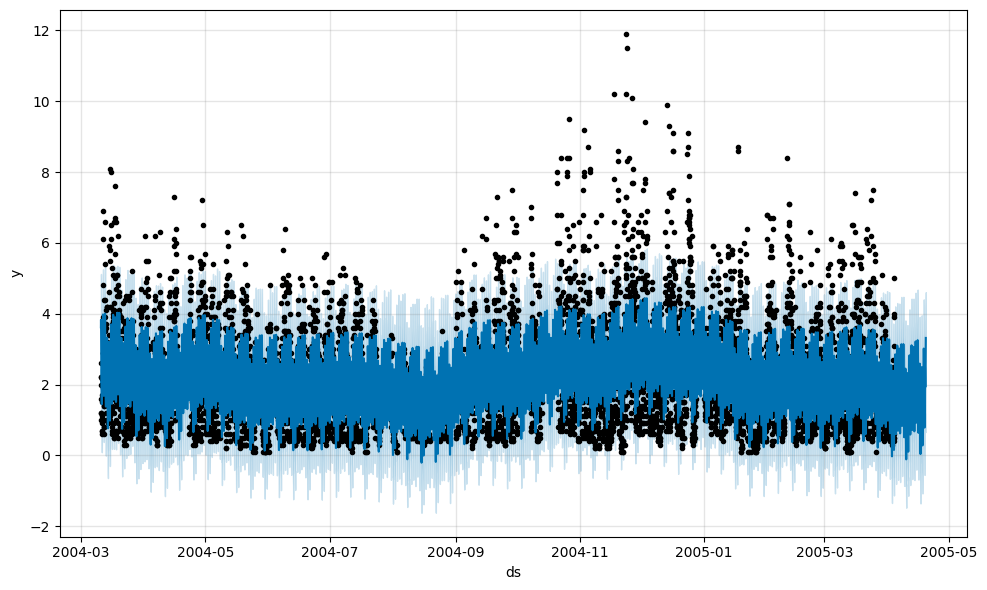

In [ ]:
fig1 = model.plot(forecast)

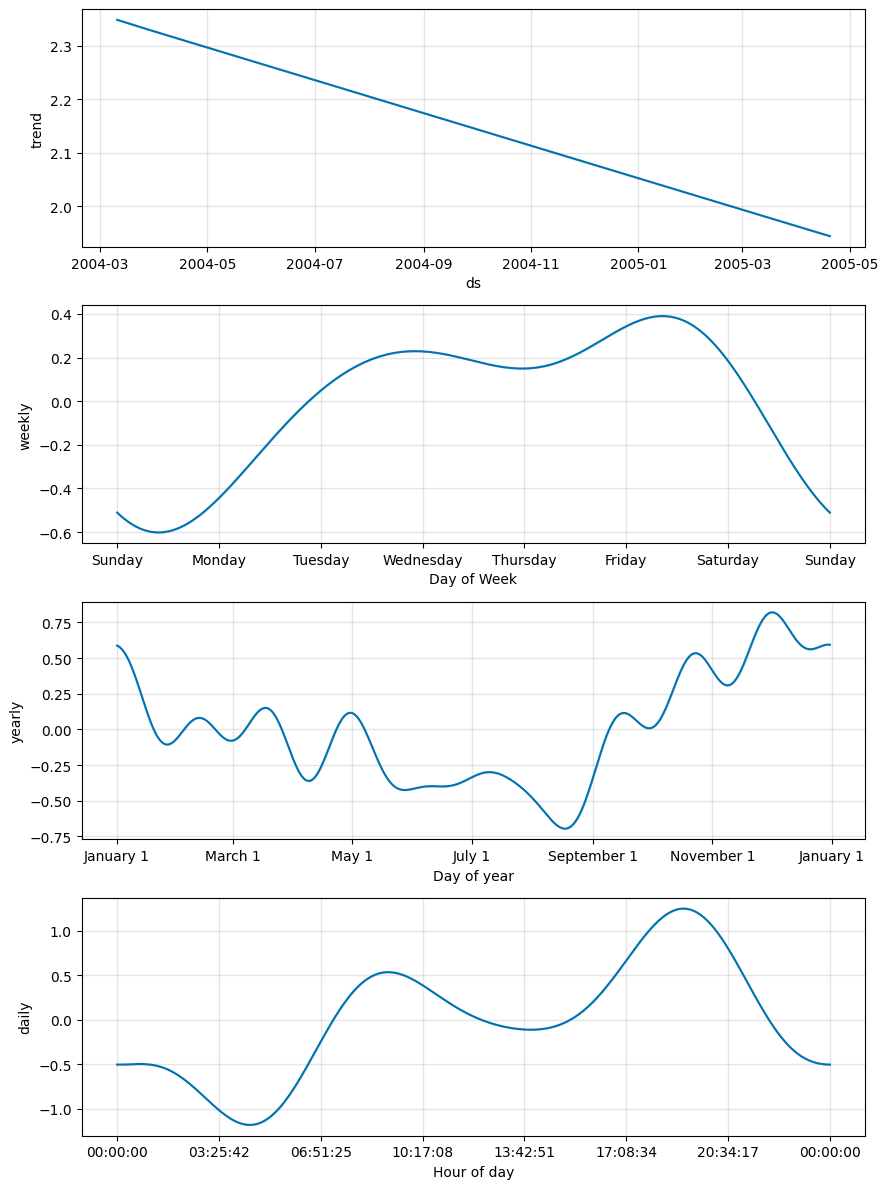

In [ ]:
fig2 = model.plot_components(forecast)